In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import kernels
import svm
import cv

In [2]:
C = [0.05, 0.5, 5.0, 10.0, 100.0]

In [3]:
def accuracy(y_pred: np.ndarray, y_true):
    return (y_pred==y_true).mean()

In [4]:
best_result = {}

In [5]:
for name in ["data/chips.csv", "data/geyser.csv"]:
    print(name)
    df = pd.read_csv(name)
    
    X = df[list(df)[:-1]].to_numpy()
    y = (pd.factorize(df['class'])[0] * 2 - 1)
    
    params = {'linear': [None], 'gaussian': [1, 3, 5], 'polynom' : [3, 5]}
    
    for kernel in ['linear', 'gaussian', 'polynom']:
        results = []
        for param in params[kernel]:
            kernel_function = getattr(kernels, 'make_' + kernel)(param)
            for c in C:
                model = svm.SVM(kernel_function, c)
                res = cv.cross_validation(X, y, model, accuracy)
                results.append((res, kernel, param, c))
                print(results[-1])
                    
        results.sort(reverse=True)
        
        print("\nBest results:")
        print(*results[:3], sep = '\n')
        print()
        
        best_result[name + kernel] = results[0] 

data/chips.csv
(0.4830508474576271, 'linear', None, 0.05)
(0.5084745762711864, 'linear', None, 0.5)
(0.5254237288135594, 'linear', None, 5.0)
(0.5508474576271186, 'linear', None, 10.0)
(0.5169491525423728, 'linear', None, 100.0)

Best results:
(0.5508474576271186, 'linear', None, 10.0)
(0.5254237288135594, 'linear', None, 5.0)
(0.5169491525423728, 'linear', None, 100.0)

(0.5254237288135594, 'gaussian', 1, 0.05)
(0.7711864406779662, 'gaussian', 1, 0.5)
(0.7796610169491526, 'gaussian', 1, 5.0)
(0.8135593220338984, 'gaussian', 1, 10.0)
(0.8050847457627118, 'gaussian', 1, 100.0)
(0.7542372881355932, 'gaussian', 3, 0.05)
(0.711864406779661, 'gaussian', 3, 0.5)
(0.7966101694915254, 'gaussian', 3, 5.0)
(0.8050847457627118, 'gaussian', 3, 10.0)
(0.788135593220339, 'gaussian', 3, 100.0)
(0.7627118644067796, 'gaussian', 5, 0.05)
(0.7966101694915254, 'gaussian', 5, 0.5)
(0.7796610169491526, 'gaussian', 5, 5.0)
(0.7796610169491526, 'gaussian', 5, 10.0)
(0.7796610169491526, 'gaussian', 5, 100.0)



In [ ]:
def make_meshgrid(x, y, h=.05):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [ ]:
for name in ["data/chips.csv", "data/geyser.csv"]:
    print(name)
    df = pd.read_csv(name)
    
    X = df[list(df)[:-1]].to_numpy()
    y = (pd.factorize(df['class'])[0] * 2 - 1)
    
    for kernel in ['linear', 'gaussian', 'polynom']:
        best = best_result[name+kernel]
        kernel_function = getattr(kernels, 'make_' + kernel)(best[2])
        c = best[3]
        
        model = svm.SVM(kernel_function, c)
        model.fit(X, y)
        print(best)
        
        fig, ax = plt.subplots()
        title = (f'{name} for {kernel} kernel')

        X0, X1 = X[:, 0], X[:, 1]
        xx, yy = make_meshgrid(X0, X1)

        plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_title(title)
        plt.show()

data/chips.csv
(0.5508474576271186, 'linear', None, 10.0)


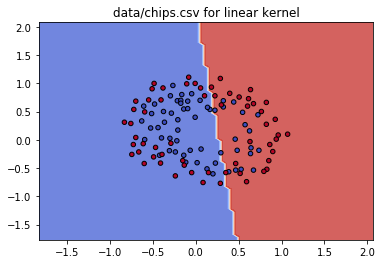

(0.8135593220338984, 'gaussian', 1, 10.0)


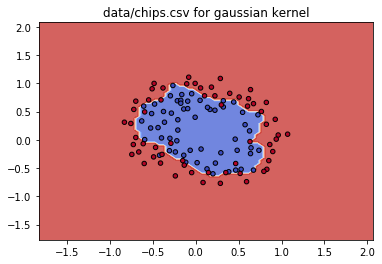

(0.8305084745762712, 'polynom', 3, 100.0)


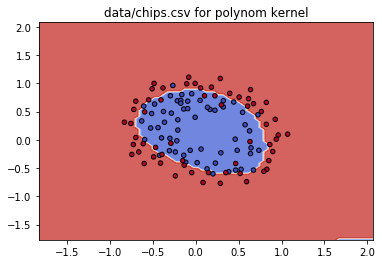

data/geyser.csv
(0.9099099099099099, 'linear', None, 0.5)


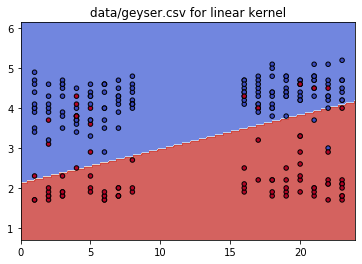

(0.8873873873873874, 'gaussian', 1, 0.05)


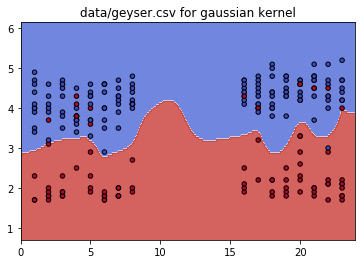

(0.7612612612612613, 'polynom', 3, 0.05)


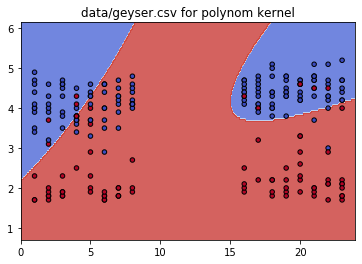

In [7]:
for name in ["data/chips.csv", "data/geyser.csv"]:
    print(name)
    df = pd.read_csv(name)
    
    X = df[list(df)[:-1]].to_numpy()
    y = (pd.factorize(df['class'])[0] * 2 - 1)
    
    for kernel in ['linear', 'gaussian', 'polynom']:
        best = best_result[name+kernel]
        kernel_function = getattr(kernels, 'make_' + kernel)(best[2])
        c = best[3]
        
        model = svm.SVM(kernel_function, c)
        model.fit(X, y)
        print(best)
        
        fig, ax = plt.subplots()
        title = (f'{name} for {kernel} kernel')

        X0, X1 = X[:, 0], X[:, 1]
        xx, yy = make_meshgrid(X0, X1)

        plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_title(title)
        plt.show()